<a href="https://colab.research.google.com/github/KeertanPatro/EDA_Classification/blob/main/Cardiovascular_risk_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular risk prediction





##### **Project Type**    - Classification  
##### **Name**    - Abhishek Somashekara


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Project Summary -**

The goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.**The dataset provided information on over 3,000 patients and included 15 attributes**, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.  

To prepare the data for analysis, extensive preprocessing was performed to clean and transform the data. This included **handling missing values using median, mode, and KNN imputation techniques**, as well as identifying and **removing outliers using the Interquartile Range (IQR) method**. Skewed continuous **variables were also transformed using log transformations** to reduce skewness and improve model performance.  

Feature selection was performed using variance inflation factor to remove multicollinearity and a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also removed to simplify the dataset. The most important features for predicting CHD risk were identified as ‘age’, ‘sex’, ‘education’, ‘cigs_per_day’, ‘bp_meds’, ‘prevalent_stroke’, ‘prevalent_hyp’, ‘diabetes’, ‘total_cholesterol’, ‘bmi’, ‘heart_rate’, ‘glucose’, and ‘pulse_pressure’.  

To handle the imbalanced nature of the dataset, the **SMOTE combined with Tomek links undersampling technique was used to balance the class distribution** and improve model performance. The data was also scaled using standard scalar method to ensure that all features were on the same scale.  

Several machine learning models were evaluated on their performance on the **primary evaluation metric of Recall**. After careful analysis, the **SVM (tuned) was chosen as the final prediction model** because it had the highest recall score among the models evaluated. By selecting a model with a high recall score, the goal was to correctly identify as many patients with CHD risk as possible, even if it meant having some false positives.  

Overall, this project demonstrated the potential of machine learning techniques to accurately predict CHD risk in patients using data from a cardiovascular study. By carefully preprocessing and transforming the data, selecting relevant features, and choosing an appropriate model based on its performance on a relevant evaluation metric, it was possible to achieve a positive business impact by accurately predicting CHD risk in patients.  

# **GitHub Link -**

https://github.com/KeertanPatro/EDA_Classification/blob/main/Cardiovascular_risk_prediction_final.ipynb

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 3,000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# librariers for hypothesis tests

from scipy.stats import chi2_contingency

# libraries for data preprocessing and ML model implementation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


In [ ]:
plt.style.use('ggplot')

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
df=pd.read_csv(r'D:\Abhi\python\data_cardiovascular_risk.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Dataset Last look
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


There are no duplicate values found in this dataset.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

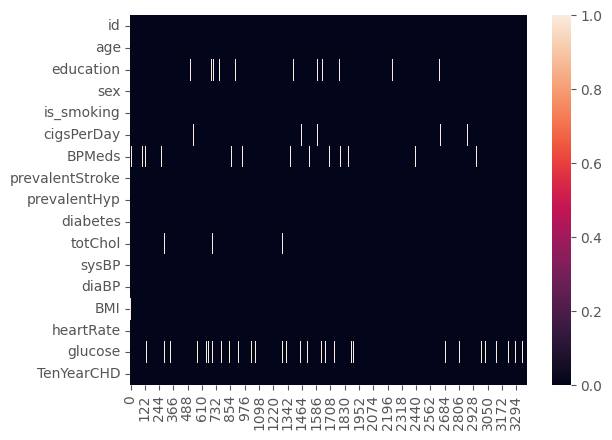

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

* The Dataset has 3390 rows and 17 columns.
* There are no duplicates in this dataset.
* There are null values in certain columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# categorical variables
df.describe(include=['object','category'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [ ]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Variables Description

There are 16 variables each of the variables is a potential risk factor in causing a coronary heart disease. These 15 variables can be categorised into 3 classification, they are Demographic, behavorial and medical.

**Demographic**
* Sex:  Sex of the person("M" or "F").
* Age: Age of the person(Continious)
* Education (discrete)

**Behavorial**
* is_smoking: Is the person smoking or not ("YES" or "NO")
* Cigs_per_Day: How cigerattes does the person smoke per day.


**Medical**
* BP meds : whether or not the patient was on blood pressure medication (Nominal)
* Prevalent_stroke:  whether or not the patient had previously had a stroke (Nominal)
* Prevalent_hyp:  whether or not the patient was hypertensive (Nominal)
* Diabetes: Wether the patient is diabetic or not (Nominal)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)

**Target variable (desired target)**
* TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.drop('id',axis=1,inplace=True)

In [ ]:
# distinguishing numerical and categorical variables

cat_variables=[i for i in df.columns if df[i].nunique()<=4]
print(cat_variables)
num_variables=[i for i in df.columns if df[i].nunique()>4]
print(num_variables)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### What all manipulations have you done and insights you found?

1. I first dropped 'id' column from the dataset.
2. I distinguished numerical column and categorical column based on the fact that if number of unique values are less than 4 it is categorical if more than 4 it is numerical.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

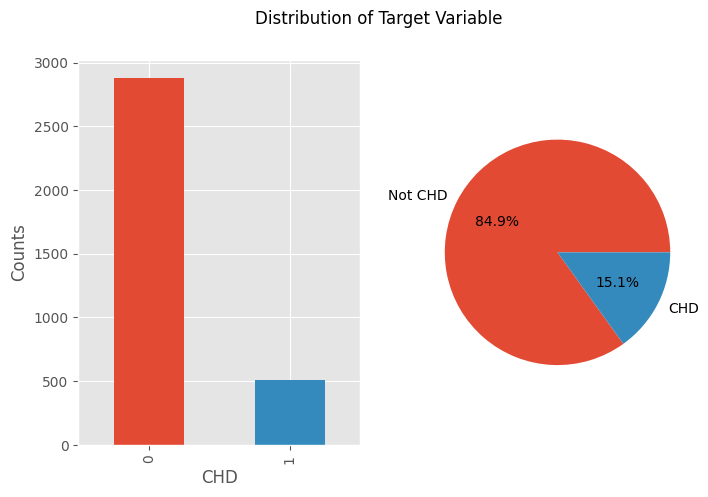

In [ ]:
# Chart - 1 visualization code

# Distribution of Target variable
color=sns.color_palette()
fig=plt.figure(figsize=(8,5))
fig.suptitle("Distribution of Target Variable")
plt.subplot(1,2,1)
df['TenYearCHD'].value_counts().plot.bar(color=color)
plt.xlabel("CHD")
plt.ylabel("Counts")
plt.subplot(1,2,2)
plt.pie(df['TenYearCHD'].value_counts(),labels=['Not CHD','CHD'],autopct='%.1f%%',colors=color)

plt.show()

##### 1. Why did you pick the specific chart?

It is important to know how your target variables are distributed, based on that you can do certain transformation while fitting ML models.

##### 2. What is/are the insight(s) found from the chart?

We see that about 85 % of the people in this dataset don't have a risk of getting cornonary heart disease, while 15% have the risk of getting a cornonary heart disease, this makes the dataset imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight will help us create appropriate ML models which will help us in better prediction

#### Chart - 2

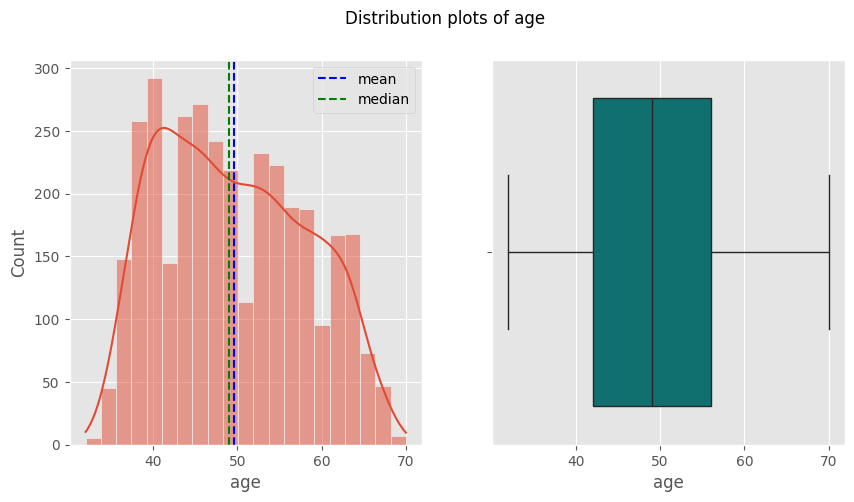

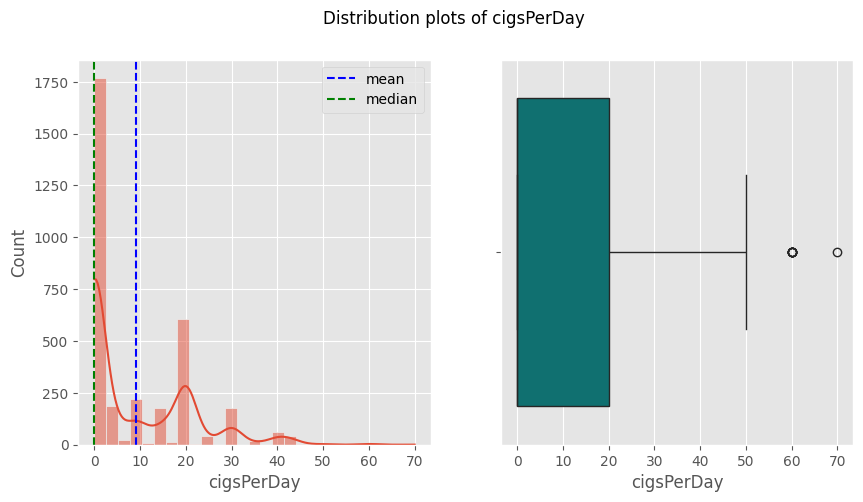

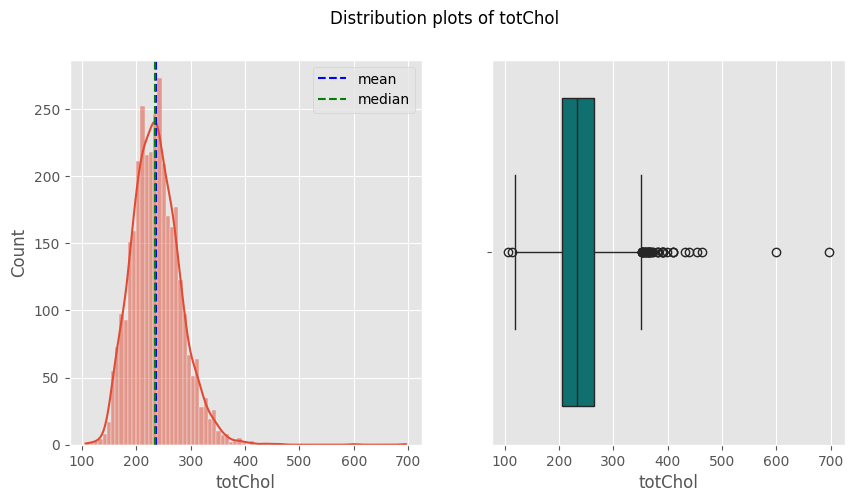

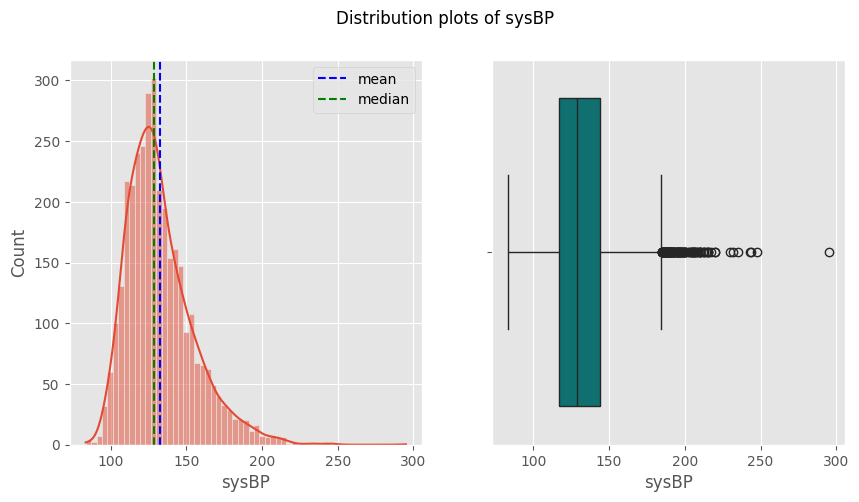

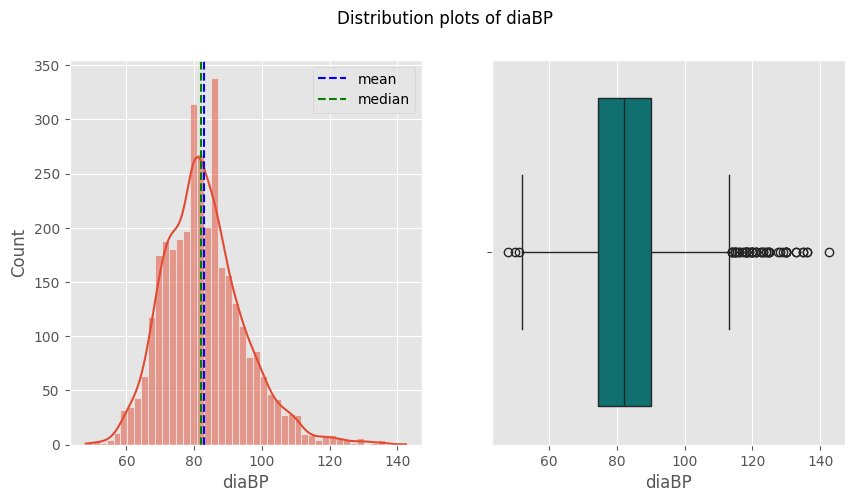

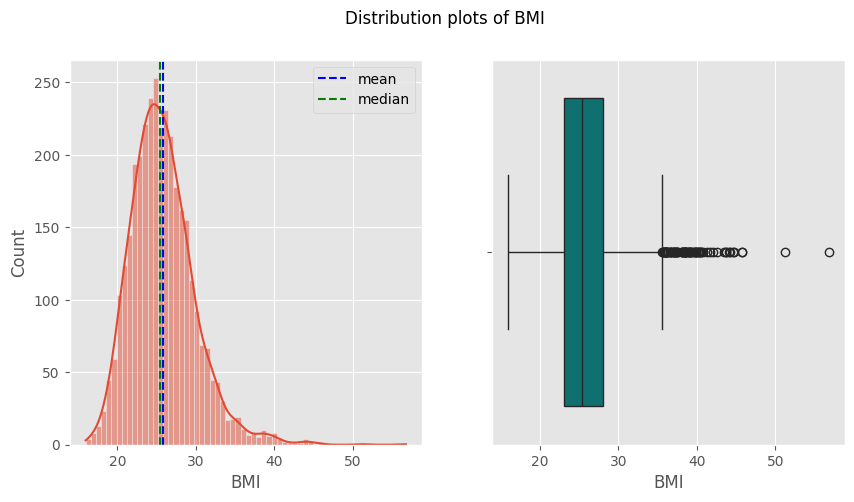

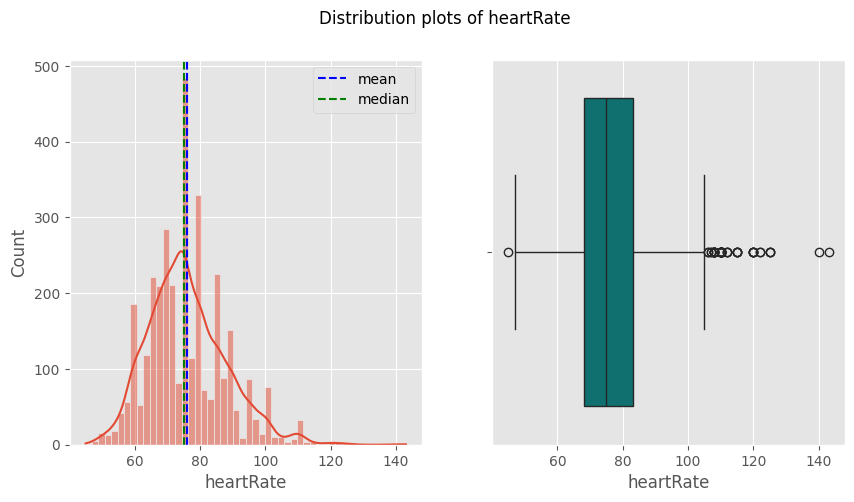

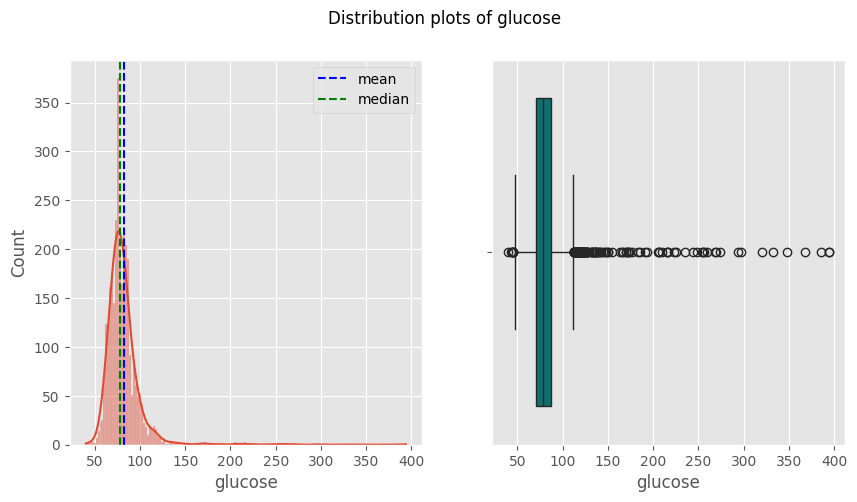

In [ ]:
# Chart - 2 visualization code
# Distribution of numeric variables
for i in num_variables:
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  sns.histplot(df[i],kde=True,ax=ax[0])
  ax[0].axvline(df[i].mean(),color='blue',linestyle='--',label='mean')
  ax[0].axvline(df[i].median(),color='green',linestyle='--',label='median')
  ax[0].legend()
  sns.boxplot(x=df[i],ax=ax[1],color='teal')
  fig.suptitle("Distribution plots of "+i)

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of other numeric variables as it helps us to understand what kind of ML models to use. We have used histplot to understand nature of the distribution and used boxplot to know about statistical description about each of the variables, we also wanted to see the presence of outliers in each of these variables.

##### 2. What is/are the insight(s) found from the chart?

Most of the numerical variables seem to follow normal distribution with appreciable amount of skewness.There seems to be many outliers for different variables, we need to handle these outliers for better performance of our ML models.

#### Chart - 3

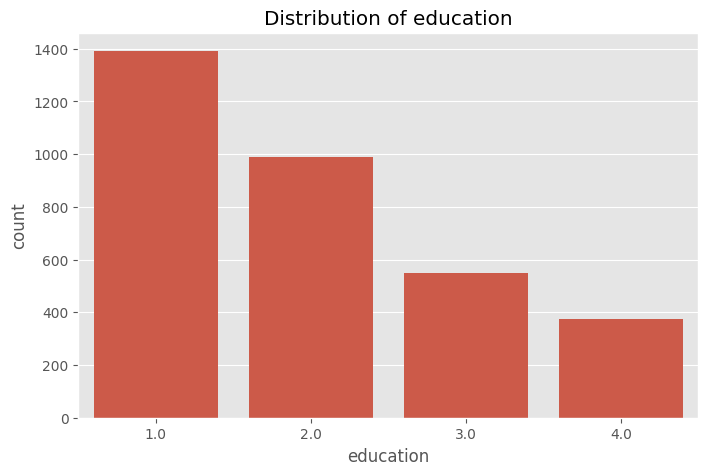

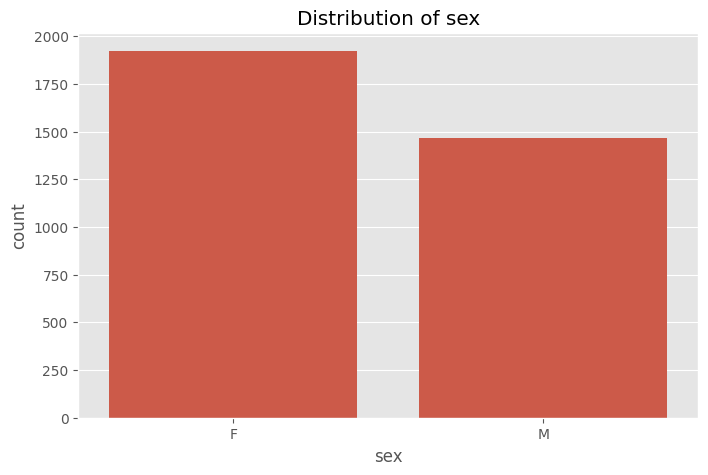

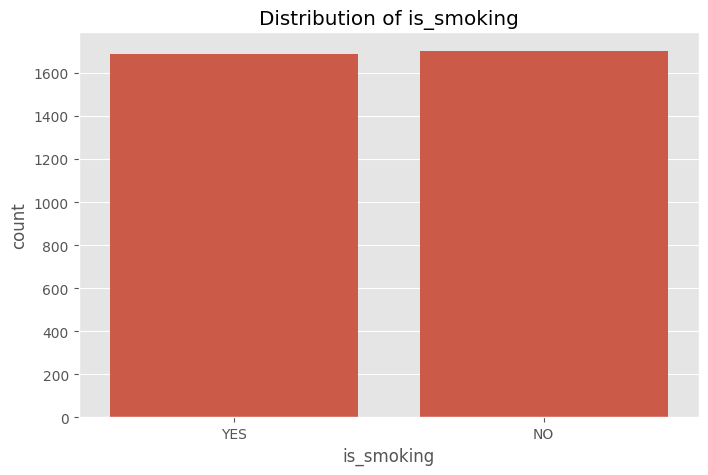

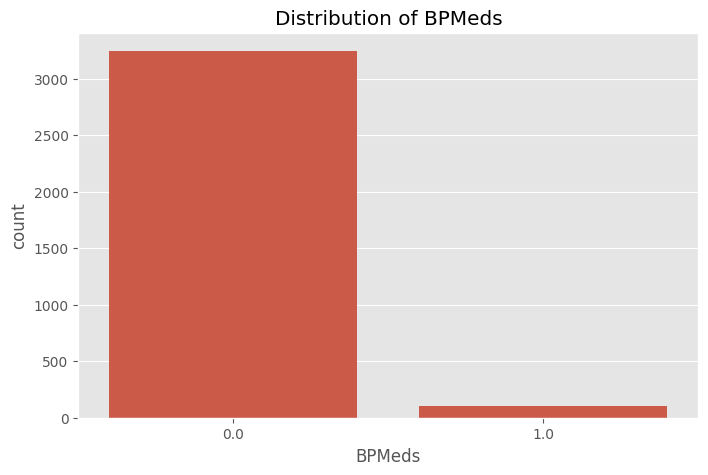

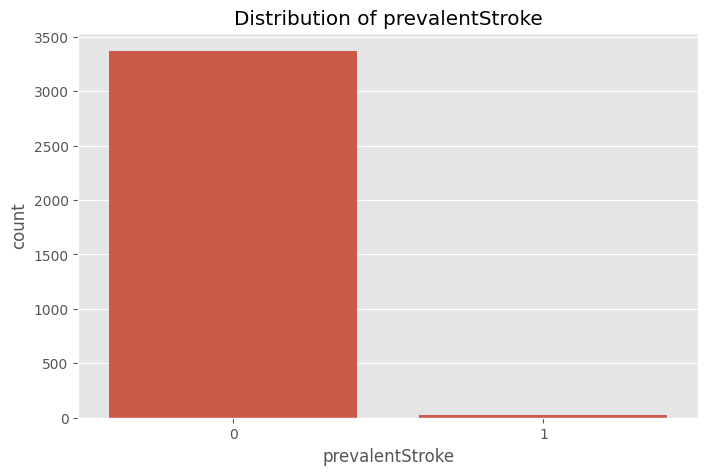

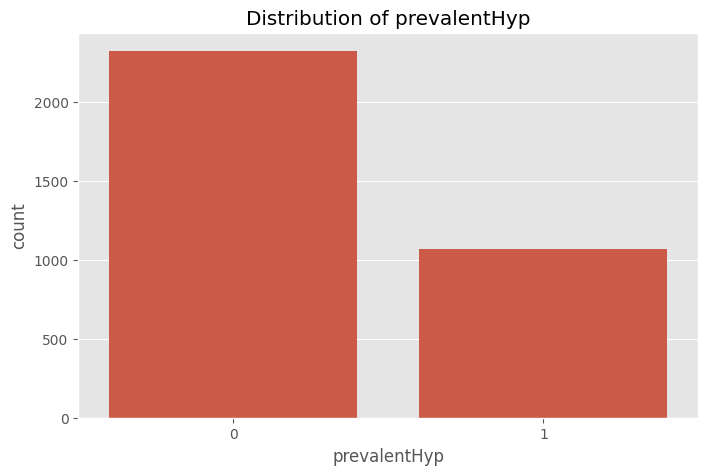

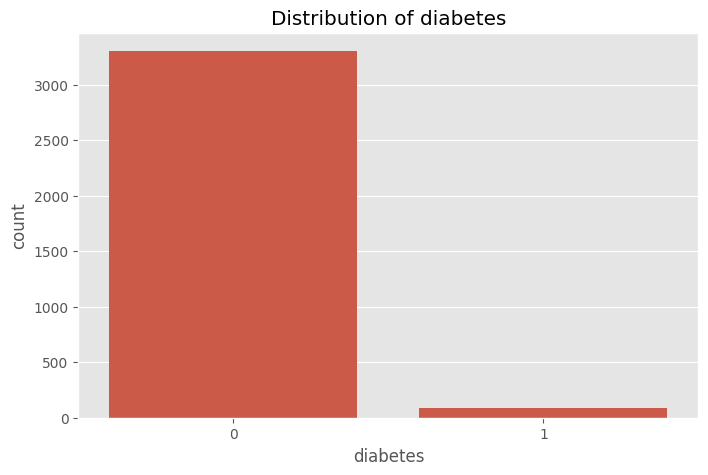

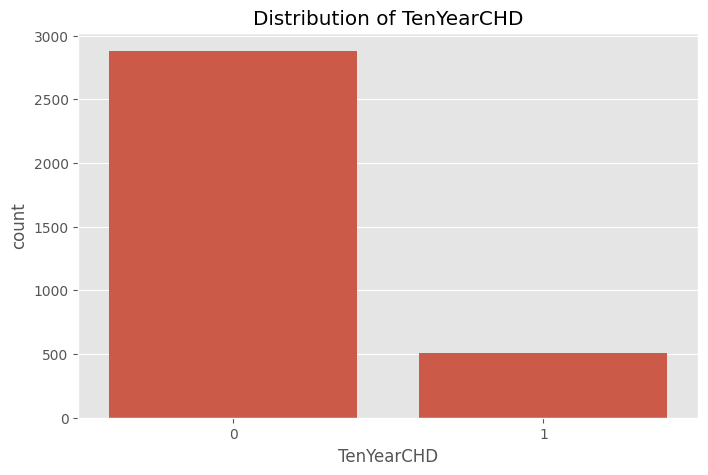

In [ ]:
# Chart - 3 visualization code

# Distribution of categorical variables
for col in cat_variables:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df)
  plt.title("Distribution of "+col)
  plt.show()

##### 1. Why did you pick the specific chart?

Here we have analysed the distribution of categorical variables, all of these categorical variables are demographic variables, we want to look into the distribution of these categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are 7 categorical variables each of them provide some insight.
* From the distribution of education we infer that there are lot of people with education qualification of 1, less many people with education qualification of 4.
* From the distribution of sex variable we that there are more females than males.
* From the distribution of number of people smoking we see that there are equal number of people who smoke and who don't smoke.
* From the distribution of BP meds we see that there are very few people who take BP medication.
* From distribution of prevalent stroke we that that there are few people who suffer from prevalent stroke
* From distribution of prevalent hypertension we that that there are good number of people who suffer from prevalent hypertension but it is less than the number of people who don't suffer from prevalent hypertension.
* There are very few people who are diabetic.

#### Chart - 4

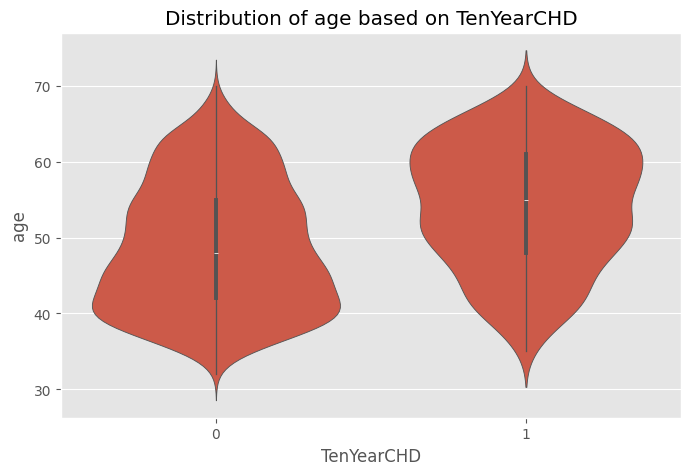

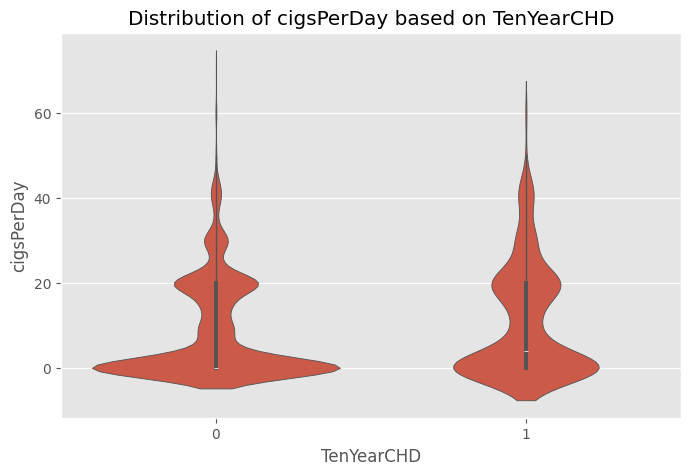

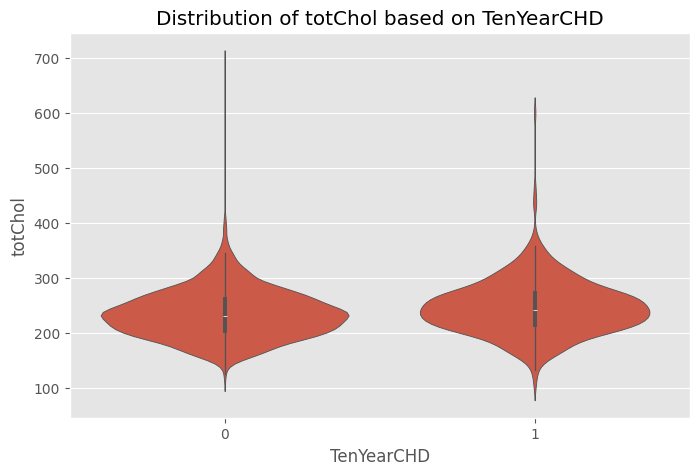

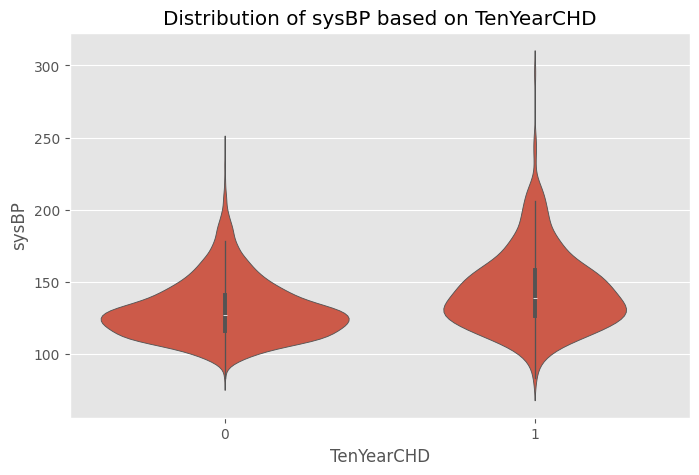

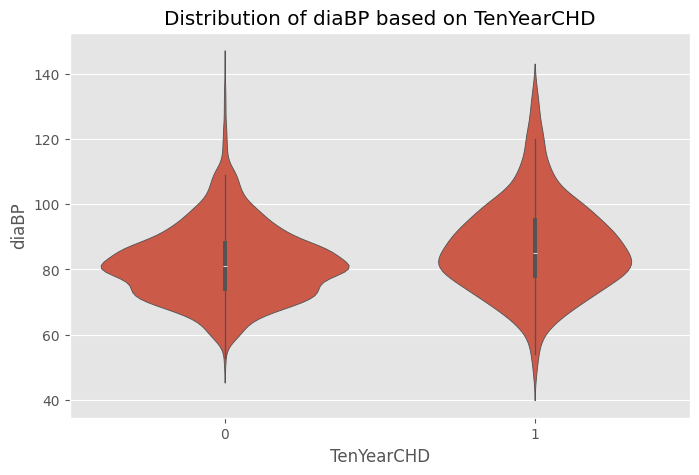

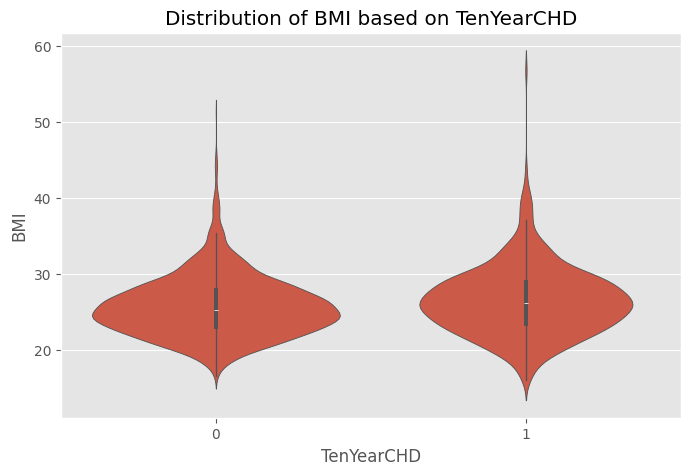

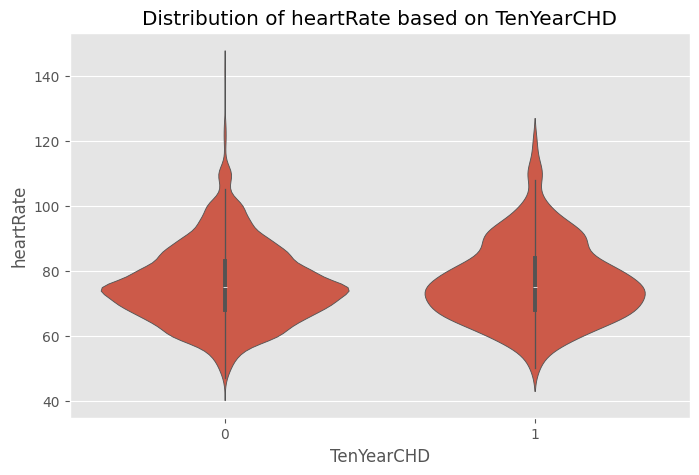

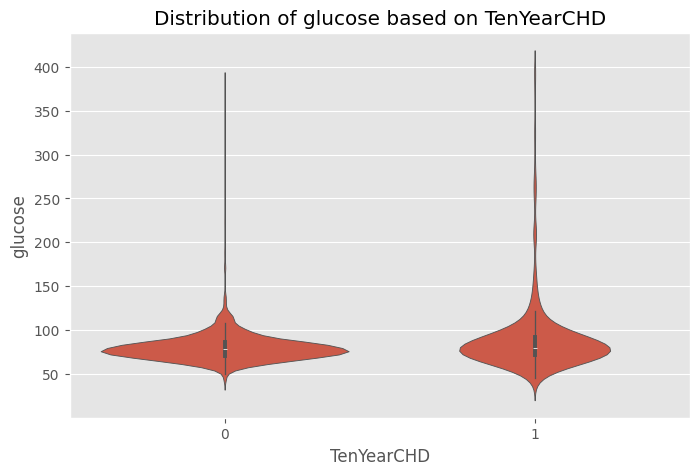

In [ ]:
# Chart - 4 visualization code

# Distribution of numeric variables based on target variable
for col in num_variables:
  plt.figure(figsize=(8,5))
  sns.violinplot(x ='TenYearCHD', y = col, data = df)
  plt.title("Distribution of "+col +" based on TenYearCHD")

##### 1. Why did you pick the specific chart?

Here we are doing bivariate analysis of target variable with respect to various numeric variables, a violin plot is the best method to unserstand the relation between these two variables.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above chart are:
* People with age around 60 have high risk of getting CHD(cornary heart disease)
* People with choestrol around 250 have high risk of getting CHD
* People with Sys BP around 125 have high risk of getting CHD
* People with dia BP of around 80 have high risk of getting CHD
* people with high risk of getting CHD have BMI around 25
* people with high risk of CHD have glucode level around 60

#### Chart - 5

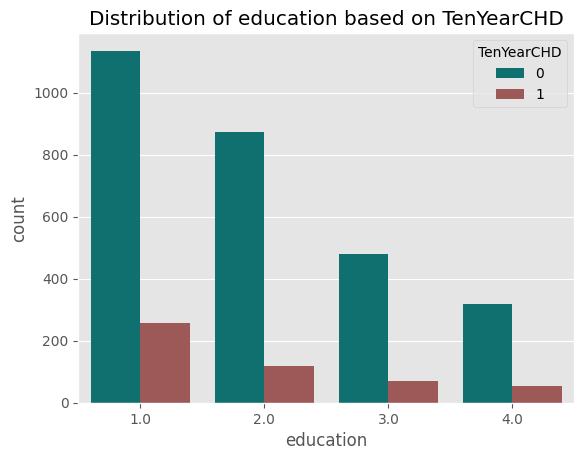

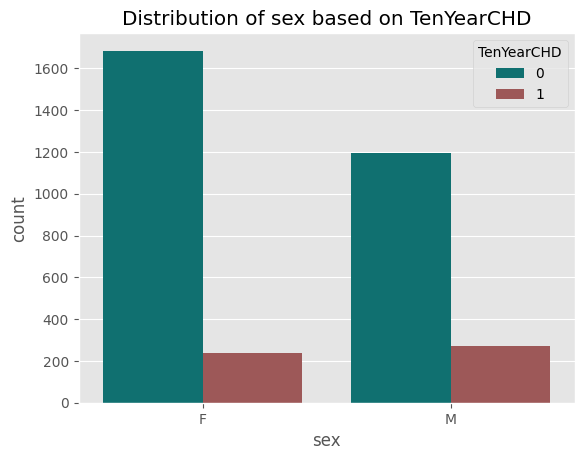

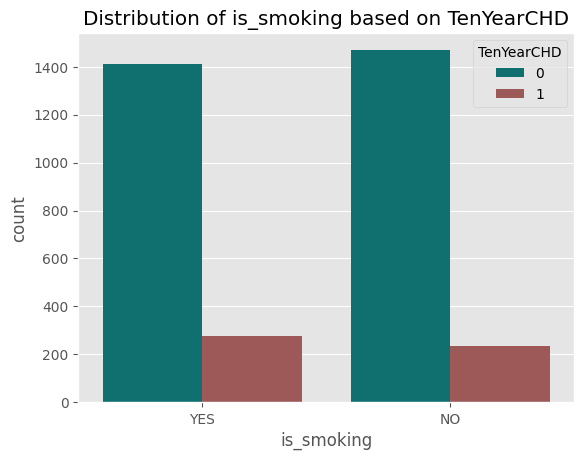

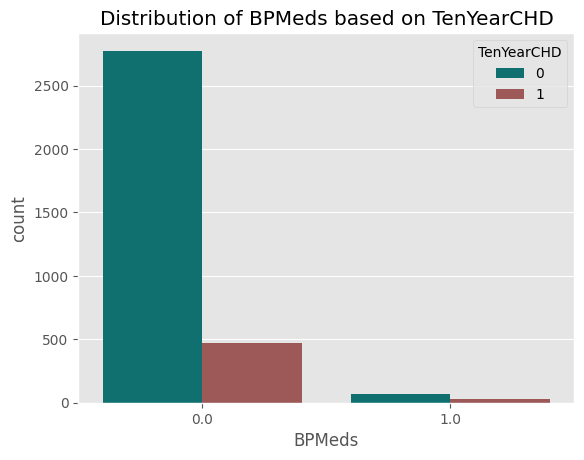

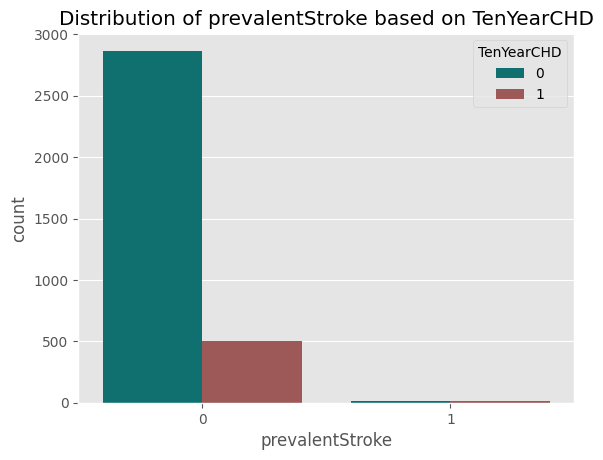

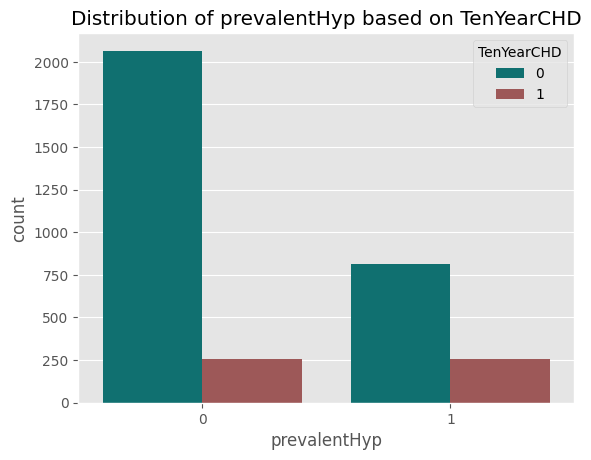

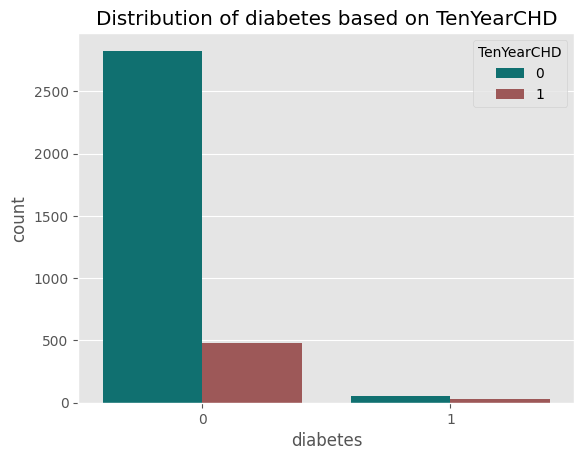

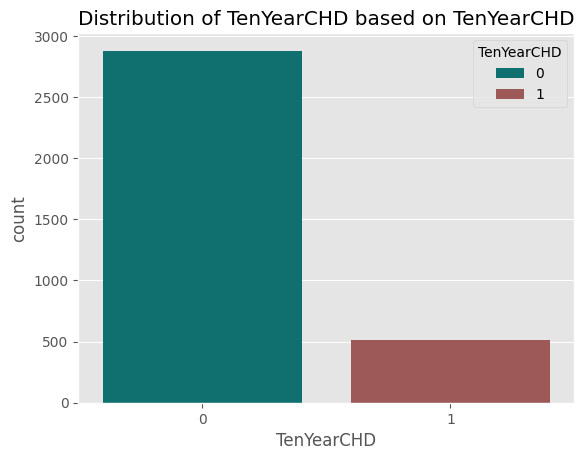

In [ ]:
# Chart - 5 visualization code
# categorical variable vs target variable

palette={0:'teal',1:'#a94c4c'}
for col in cat_variables:
  plt.figure()
  sns.countplot(x=col,data=df,hue=df['TenYearCHD'],palette=palette)
  plt.title("Distribution of "+col +" based on TenYearCHD")


##### 1. Why did you pick the specific chart?

In this charts we have done a bivariate analysis between categorical variables and our target variables using a bar plot to understand the behaviour of our categorical variables wrt target variable.

##### 2. What is/are the insight(s) found from the chart?

There are some insights which are found from above chart:
* Both male and female have equal number of CHD, suggesting that CHD is not gender specific.
* Equal number of people who smoke and people who don't smoke are affected by CHD, which might suggest that smoking does not cause CHD.
* 50 percent of the people who are in a risk of CHD suffere from prevelent hypertension.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this insights we get an idea how demographics variables such as gender, age,education etc are related to CHD, we can create more awareness while spreading this information.

#### Chart - 6 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
'''plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')
plt.show()'''

"plt.figure(figsize=(10,6))\nsns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')\nplt.show()"

##### 1. Why did you pick the specific chart?

We picked this chart to understand the correlation between our variables, we don't want high multicolinearity between our variables as this can affect our ML models performance.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we found that variables SysBP and DiaBP have high correlation, we also found variables glucose and diabetes have high correlation.

#### Chart - 7 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df,corner=True)

##### 1. Why did you pick the specific chart?

We have done multivariate analysis to understand relationship between each variables.

##### 2. What is/are the insight(s) found from the chart?

We find that variables SysBP and diaBP have linear relationship, which we also found in correlation plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We define three Hypothetical statements
1. There is no association between education and CHD.
2. There is no association between gender and CHD.
3. There is no association between smoking and CHD.

* Here we have significance leel of 0.05.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis H0**:** There is no association between education and CHD  

Alternative Hypothesis H1**:** There is association between education and CHD

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['education'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
education            
1.0         1135  256
2.0          872  118
3.0          479   70
4.0          319   54
The p_value obtained is 6.0386467492345515e-05


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between education and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between gender and CHD  
H1: There is association between gender and CHD

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['sex'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272
The p_value obtained is 1.060878293561798e-06


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between gender and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between smoking and CHD.  
H1: There is association between smoking and CHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['is_smoking'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275
The p_value obtained is 0.05239062274853224


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is higher than our significance value of 0.05, hence fail reject our null hypothesis that there is no association between smoking and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# looking into null values
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
# Handling Missing Values & Missing Value Imputation

# education
df['education']=df['education'].fillna(df['education'].mode()[0])
# BPMeds
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
# totchol
df['totChol']=df['totChol'].fillna(df['totChol'].median())
# BMI
df['BMI']=df['BMI'].fillna(df['BMI'].median())
# HeartRate
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
# cigsperday
print("The median of number of cigs per day is:",df['cigsPerDay'].median())
df.loc[df['cigsPerDay'].isna()].head()

The median of number of cigs per day is: 0.0


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0


If we look into nan values in 'cigsPerDay' column we see that the person is smoking it does not make sense to replace the nan values with median as median is zero.

In [ ]:
# cigsperday
median_cigs=df.loc[df['is_smoking']=='YES']['cigsPerDay'].median()
df['cigsPerDay']=df['cigsPerDay'].fillna(median_cigs)

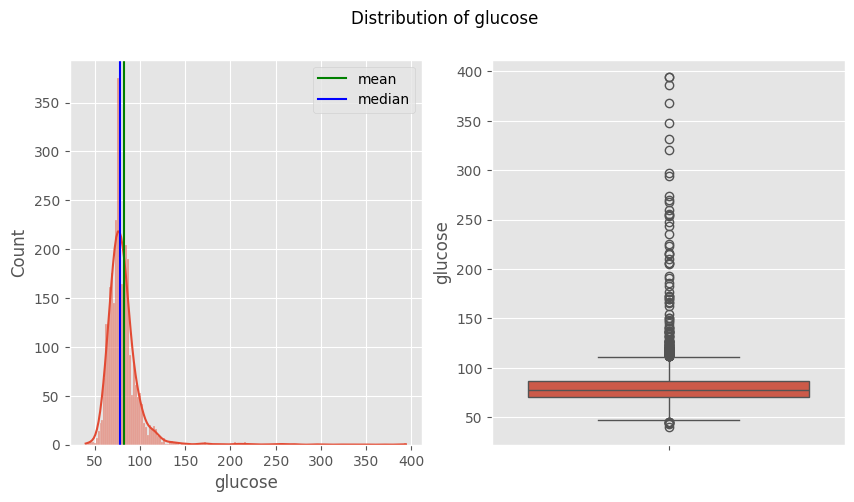

In [ ]:
# glucose levels
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['glucose'],kde=True,ax=ax[0])
ax[0].axvline(df['glucose'].mean(),label='mean',color='green')
ax[0].axvline(df['glucose'].median(),label='median',color='blue')
ax[0].legend()
sns.boxplot(y=df['glucose'],ax=ax[1])
fig.suptitle("Distribution of glucose")
plt.show()

There are many outliers in glucose column, the distribution is right skewed.  There are large numbers of nan values and replacing them with median will change the distribution and will give bad results, so we replace them using **knn imputer** .

In [ ]:
# converting object into numeric variables
df['is_smoking']=df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)
df['sex']=df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [ ]:
# applying knn imputation in glucose levels
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=8)
imputer.fit(df)
imputed_values=imputer.transform(df)
df=pd.DataFrame(imputed_values,columns=df.columns)

#### What all missing value imputation techniques have you used and why did you use those techniques?

1) We have replaced categorical features like 'education','BPmeds' with mode values, other features like 'totchol', 'BMI', 'HeartRate' with median values.  

2) We have replaced 'CigsperDay' with median value of all those observation for which smoking='Yes'.   

3) We have used knn imputer to fill the missing values in 'glucose' column as the number of null values are high.  

In [ ]:
continious_var=num_variables.copy()

In [ ]:
continious_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
cat_variables

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

### 2. Feature Manipulation & Selection

In [ ]:
chd_df=df.copy()

#### 1. Feature Manipulation

In [ ]:
num_variables=list(chd_df.describe().columns)
num_variables

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
chd_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: >

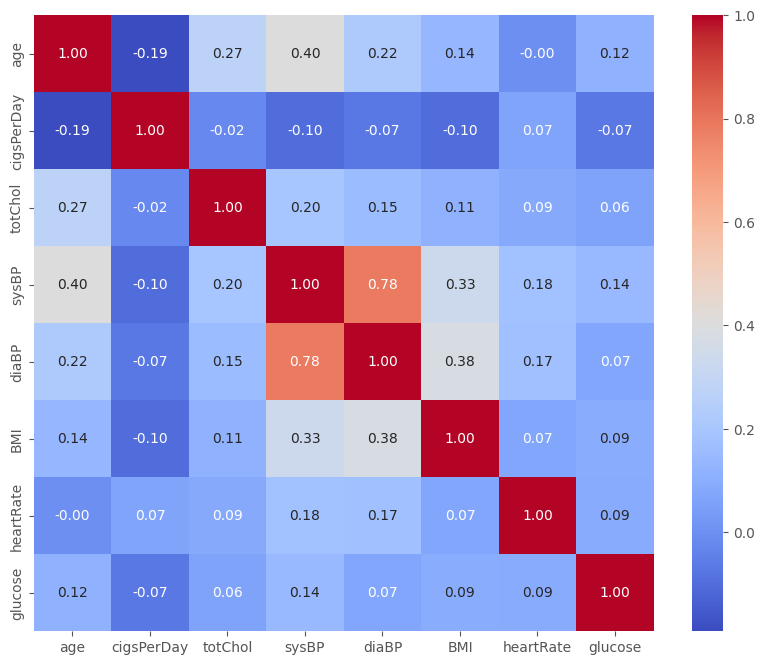

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(chd_df[continious_var].corr(),cmap='coolwarm',annot=True,fmt='0.2f')

In [ ]:
# Vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
  vif_df=pd.DataFrame()
  vif_df['Variables']=X.columns
  vif_df['VIF']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
  return vif_df



ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
vif(chd_df[[col for col in continious_var if col not in ['TenYearCHD']]])

In [ ]:
# not including 'DiaBP'
chd_df['pulse_pressure']=(chd_df['sysBP']-chd_df['diaBP'])
num_variables.append('pulse_pressure')
continious_var.append('pulse_pressure')
vif(chd_df[[col for col in continious_var if col not in ['TenYearCHD','diaBP','sysBP','is_smoking']]])

In [ ]:
#continious_var.remove(['sysBP','diaBP'])
continious_var=[i for i in continious_var if i not in['sysBP','diaBP']]

In [ ]:
continious_var

In [ ]:
# looking into updated correlation plot
sns.heatmap(chd_df[continious_var].corr(),cmap='coolwarm',annot=True,fmt='0.2f')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
chd_df.drop(['is_smoking','sysBP','diaBP'],axis=1,inplace=True)


In [ ]:
chd_df.shape

In [ ]:
chd_df.columns

##### What all feature selection methods have you used  and why?

* We have used VIF method to reduce the number of multicollinear features, we have found that sysBP and diaBP are correlated we removed this features and added new feature Pulse pressure to describe the working of these two features.

* We have also removed 'is_smoking' as this feature and feature cigsPerDay mean the same thing.

##### Which all features you found important and why?

The features which we found important are 'age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'education, 'Pulse pressure', 'sex_M', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' as these variables are not correlated to each other and contain important information which will able to predict the risk of patient getting a CHD.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
continious_var

Let us look into the distribution of continious variables..

In [ ]:
# Transform Your data
discrete_var=[i for i in cat_variables if i not in ['is_smoking','TenYearCHD']]
fig,ax=plt.subplots(3,3,figsize=(9,8))
for i,col in enumerate(continious_var):
  plt.subplot(3,3,i+1)
  sns.histplot(chd_df[col],kde=True)
  plt.tight_layout()


From the plots we see that the distribution is skewed, let us see the skewness

In [ ]:
# calculating skewness
chd_df[continious_var].skew()

In [ ]:
# applying log transformation to it
np.log10(chd_df[continious_var]+1).skew()

From log transformation we are able to reduce some skewness

In [ ]:
# transforming the data
for col in continious_var:
  chd_df[col]=np.log10(chd_df[col]+1)

chd_df[continious_var].skew()

### 4. Data Splitting

In [ ]:
X=chd_df.drop('TenYearCHD',axis=1)
y=chd_df['TenYearCHD']

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [ ]:
y_train.value_counts()/y_train.shape[0]

In [ ]:
y_test.value_counts()/y_test.shape[0]

##### What data splitting ratio have you used and why?

I have used 70:30 ratio on Train and Test data, as the data is highly imbalanced, in order to get a good proportion of both the labels i have done stratified train test splitting.

### 5. Handling Outliers

In [ ]:
continious_var

In [ ]:
# Handling Outliers & Outlier treatments
for num_col in continious_var:
  Q1=chd_df[num_col].quantile(0.25)
  Q3=chd_df[num_col].quantile(0.75)
  iqr=Q3-Q1
  upper_limit=Q3+1.5*iqr
  lower_limit=Q1-1.5*iqr
  chd_df[num_col]=chd_df[num_col].apply(lambda x: upper_limit if x>upper_limit else lower_limit if x<lower_limit else x) # here we set high value to upper limit and low values to lower limit

In [ ]:
for col in continious_var:
  plt.figure()
  sns.boxplot(chd_df[col])
  plt.title(col)

In [ ]:
chd_df.shape

In [ ]:
chd_df.columns

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used IQR method for outlier treatment where we set an upper_limit and lower limit, for values higher than upper_limit replace them with upper_limit, similar method for values lower than lower_limit.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the data is imbalanced as there very few people in the data set who have been labelled as 1, i.e, risk of getting a CHD

In [ ]:
# before handling imbalanced data
y_train.value_counts().plot.bar(title='predictor variable before SMOTE')
plt.show()

In [ ]:
# Handling Imbalanced Dataset (If needed)
smt = SMOTETomek(random_state=42)
X_res_tr, y_res_tr = smt.fit_resample(X_train, y_train)

In [ ]:
y_res_tr.value_counts().plot.bar(title='predictor variable after SMOTE +Tomek ')
plt.show()

In [ ]:
print("The shape of resampled train data",X_res_tr.shape)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE along with Tomek links to handle imbalance dataset, we have used tomek links to improve our classification strength and SMOTE to handle the imbalance dataset.

### 7. Scaling Data

In [ ]:
scaler=StandardScaler()

# transforming train data
X_res_scaled_tr=scaler.fit_transform(X_res_tr)

# transforming test data
X_scaled_tst=scaler.fit_transform(X_test)

We have used Standard scaler.  
1) We used Standard scaler on the resampled train data  
2) We used Standard scaler on the original test data.

## ***7. ML Model Implementation***

In [ ]:
# ML model function to calculate scores
def model_scores(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train) # fitting the model

  y_pred_tr=model.predict(X_train) # predicted train labels
  y_pred_tst=model.predict(X_test) # predicted test labels

  try:
    y_prob_tr=model.predict_proba(X_train)[:,1] # probability values for train
    y_prob_tst=model.predict_proba(X_test)[:,1] # probability values for test
  except:
    pass

  # calculating roc_auc scores
  roc_auc_tr=roc_auc_score(y_train,y_prob_tr)
  roc_auc_tst=roc_auc_score(y_test,y_prob_tst)
  print(" ROc-AUC score for train data is", roc_auc_tr)
  print(" ROC-AUC score for test data is",roc_auc_tst)

  # plotting roc_auc curve
  fpr_tr,tpr_tr,thresholds_tr=roc_curve(y_train,y_prob_tr)   # roc_curve for train
  fpr_tst,tpr_tst,thresholds_tst=roc_curve(y_test,y_prob_tst) # roc_curve for test
  plt.plot(fpr_tr,tpr_tr,label='roc_auc curve for train')
  plt.plot(fpr_tst,tpr_tst,label='roc_curve for test')
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.legend()
  plt.show()

  # plotting confusion matrix for train and test data.
  cm_train=confusion_matrix(y_train,y_pred_tr)
  cm_test=confusion_matrix(y_test,y_pred_tst)

  fig,ax=plt.subplots(1,2,figsize=(10,5))
  # cm for train data
  sns.heatmap(cm_train,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[0],fmt='.0f')
  ax[0].set_xlabel("Predicted labels")
  ax[0].set_ylabel("True labels")
  ax[0].set_title("Confusion matrix for Train Data")

  # cm for test data
  sns.heatmap(cm_test,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[1],fmt='.0f')
  ax[1].set_xlabel("Predicted labels")
  ax[1].set_ylabel("True labels")
  ax[1].set_title("Confusion matrix for Test Data")
  plt.show()

  # classification report
  target_names=[0,1]
  clr_tr=classification_report(y_train,y_pred_tr,target_names=target_names,output_dict=True)
  clr_tst=classification_report(y_test,y_pred_tst,target_names=target_names,output_dict=True)
  clr_tr_df=pd.DataFrame(clr_tr).T
  clr_tst_df=pd.DataFrame(clr_tst).T
  print("\n\nThe classification report for train data is:\n\n",clr_tr_df)
  print("\n\nThe classification report for test data is:\n\n",clr_tst_df)

  # calculating all scores and storing it in a list
  precision_train=clr_tr['macro avg']['precision']
  precision_tst=clr_tst['macro avg']['precision']

  recall_tr=clr_tr[1]['recall']
  recall_tst=clr_tst[1]['recall']

  acc_tr=accuracy_score(y_train,y_pred_tr)
  acc_tst=accuracy_score(y_test,y_pred_tst)

  f1_tr=clr_tr['macro avg']['f1-score']
  f1_tst=clr_tst['macro avg']['f1-score']

  model_metric=[precision_train,precision_tst,recall_tr,recall_tst,roc_auc_tr,roc_auc_tst,acc_tr,acc_tst,f1_tr,f1_tst]

  return model_metric






















In [ ]:
X.columns

In [ ]:
# plotting feature importance

def feature_importances(model,names,model_name):
  importances=np.array(model.feature_importances_)
  feature_names=np.array(names)
  data={'feature_names':feature_names,'feature_importances':importances}
  fi_df=pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importances'],ascending=False,inplace=True)
  sns.barplot(y=fi_df['feature_names'],x=fi_df['feature_importances'])
  plt.title(model_name + ' feature importance')
  plt.xlabel("Feature importances")
  plt.ylabel("Feature names")



## Logistic Regression

In [ ]:
# ML Model - 1 Implementation
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)


In [ ]:
# defing dataframe to store ml models performance metrics
model_df=pd.DataFrame(index=['precision_train','precision_test','recall_train','recall_test','roc_auc_train','roc_auc_test','accuracy_train','accuracy_test','f1_train','f1_test'])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
log_scores=model_scores(log_reg,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Logistic Regression']=log_scores
model_df

I have set my scoring to recall as it the best metric for our problem, for logistic regression recall test score is 0.77. The model seems to doing well.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


param_grid={'C':[100,10,1,0.1,0.01,0.001,0.0001]}
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
log_grid=GridSearchCV(log_reg,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
log_grid.fit(X_res_scaled_tr,y_res_tr)
print(log_grid.best_params_)
log_optimal=log_grid.best_estimator_

# Predict on the model


In [ ]:
# visualizing metric scores
log_reg_tuned=model_scores(log_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
# Evaluation metric score chart
model_df['Logistic Regression tuned']=log_reg_tuned

In [ ]:
model_df

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV with different values of 'C' as our hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From evaluation metric score chart we found no significant improvemnt in the performance of the model.

## Knn

In [ ]:
# knn implementation

knn=KNeighborsClassifier()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
knn_scores=model_scores(knn,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
# Evaluation metric score chart
model_df['KNearestNeighbors']=knn_scores
model_df

From the plot and chart we see that the model has overfitted and did not perform well on test data, we need to some tuning to our model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# finding best k value
recall_tr=[]
recall_tst=[]
for i in range(1,68):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_res_scaled_tr,y_res_tr)
  y_pred_knn_tr=knn.predict(X_res_scaled_tr)
  y_pred_knn_tst=knn.predict(X_scaled_tst)
  recall_score_tr=recall_score(y_res_tr,y_pred_knn_tr)
  recall_score_tst=recall_score(y_test,y_pred_knn_tst)
  recall_tr.append(recall_score_tr)
  recall_tst.append(recall_score_tst)


In [ ]:
k_values=range(1,68)
plt.plot(k_values,recall_tr,label='train recall')
plt.plot(k_values,recall_tst,label='test recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [ ]:
# best value of k
best_k=recall_tst.index(max(recall_tst))
print(best_k)

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid={'n_neighbors':[36],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidiean','manhattan']}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
knn=KNeighborsClassifier()
knn_grid=GridSearchCV(knn,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
knn_grid.fit(X_res_scaled_tr,y_res_tr)
print(knn_grid.best_params_)
knn_optimal=knn_grid.best_estimator_


In [ ]:
# Visualizing evaluation Metric Score chart
knn_tuned=model_scores(knn_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
# Evaluation metric score chart
model_df['KNearestNeighbors_tuned']=knn_tuned
model_df

##### Which hyperparameter optimization technique have you used and why?

Here i have used GridSearchcv, and passed various values of k, different types of weight and different types of distance metric as my hyperparameters, with scoring set to recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above evaluation score chart we see that the recall score has improved as compared to knn model without tuning, but the model score has not improved as compared to logistic regression. We also see that the model has ovefitted.

### Naive Bayes

In [ ]:
# ML Model - 3 Implementation
nb=GaussianNB()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
nb_model=model_scores(nb,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Naive Bayes']=nb_model

In [ ]:
model_df

This model does not seem to give give good results, as the recall test score is less compared to previous models, need to do hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
nb=GaussianNB()
nb_grid=GridSearchCV(nb,param_grid={'var_smoothing':np.logspace(0,-9,num=100)},cv=skf,scoring='recall')

# Fit the Algorithm
nb_grid.fit(X_res_scaled_tr,y_res_tr)
nb_optimal=nb_grid.best_estimator_
# Fit the Algorithm

# Predict on the model

In [ ]:
nb_model_cross_validated=model_scores(nb_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Naive Bayes_tuned']=nb_model_cross_validated

In [ ]:
model_df

##### Which hyperparameter optimization technique have you used and why?

We have used StratifiedKFold and GridSearchCV with var_smoothing as our hyperparameters.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There has been no significant change in the evaluation metric scores, which suggest that this model does not do well for our problem.

### Decision Tree

In [ ]:
# ML Model - 3 Implementation
dt=DecisionTreeClassifier()


In [ ]:
dt_model=model_scores(dt,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
model_df['Decision Tree']=dt_model

In [ ]:
model_df

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'max_depth' : [5,6,7,8,9,10],
        'min_samples_split' : [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf' : np.arange(10,20)}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
dt=DecisionTreeClassifier()

dt_grid=GridSearchCV(dt,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
dt_grid.fit(X_res_scaled_tr,y_res_tr)
dt_optimal=dt_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [ ]:
dt_grid.best_params_

In [ ]:
dt_model_cross_validated=model_scores(dt_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
feature_importances(dt_optimal,X.columns,'Decision Trees')

In [ ]:
model_df['Decision Trees tuned']=dt_model_cross_validated

In [ ]:
model_df

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like max_depth, min_samples_split, min_samples_leaf.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there has been a significant improvement, now the model is not overfitting anymore and the recall score has improved.

### Random Forest

In [ ]:
# ML Model - 3 Implementation
rf=RandomForestClassifier()


In [ ]:
rf_model=model_scores(rf,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
model_df['RandomForest']=rf_model

In [ ]:
model_df

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators' : [50,100,150,200,250],
        'max_depth' : [5,8,10,12,15,17],
        'min_samples_split' : [2,3,4,5]}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
rf=RandomForestClassifier()

rf_grid=GridSearchCV(rf,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
rf_grid.fit(X_res_scaled_tr,y_res_tr)
rf_optimal=rf_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [ ]:
rf_grid.best_params_

In [ ]:
rf_model_cross_validated=model_scores(rf_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
feature_importances(rf_optimal,X.columns,'Random Forest')

In [ ]:
model_df['RandomForestTuned']=rf_model_cross_validated

In [ ]:
model_df

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like max_depth, min_samples_split, min_samples_leaf.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There are no significant improvement in evaluation metric scores, and the model seems to have overfitted.

### SVM

In [ ]:
# ML Model - 3 Implementation
svc = SVC(probability=True)


In [ ]:
svc_model=model_scores(svc,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
model_df['SVM']=svc_model

In [ ]:
model_df

Looking at the model 's performance model seems to have been slightly overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
svc=SVC(probability=True)

svc_grid=GridSearchCV(svc,param_grid=param_grid,cv=skf,scoring='recall',verbose=2)

# Fit the Algorithm
svc_grid.fit(X_res_scaled_tr,y_res_tr)
svc_optimal=svc_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [ ]:
svc_grid.best_params_

In [ ]:
svc_model_cross_validated=model_scores(svc_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['SVM tuned']=svc_model_cross_validated

In [ ]:
model_df

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like C,gamma, different types of kernals.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After Crossvalidation and hyperparameter tuning the model does not overfit anymore and there is significant change in recall score.

### XG Boost

In [ ]:
# ML Model - 3 Implementation
xgb_mod=xgb.XGBClassifier(random_state=0)

In [ ]:
xgb_model=model_scores(xgb_mod,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
model_df['XG Boost']=xgb_model

In [ ]:
model_df['XG Boost']

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'learning_rate': np.arange(0.1,0.3,0.05),
              'max_depth':[2,3],
              'n_estimators': (100,150,200)
             }
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
xgb_mod=xgb.XGBClassifier(random_state=0)

xgb_grid=GridSearchCV(xgb_mod,param_grid=param_grid,cv=skf,scoring='f1')

# Fit the Algorithm
xgb_grid.fit(X_res_scaled_tr,y_res_tr)
xgb_optimal=xgb_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_model_cross_validated=model_scores(xgb_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [ ]:
feature_importances(xgb_optimal,X.columns,'XG Boost')

In [ ]:
model_df['XGBoost tuned']=xgb_model_cross_validated

In [ ]:
model_df['XGBoost tuned']

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like learning rate, max_depth, n_estimators

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There seems to be improvement but model seems to have overfitted.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used **Recall score** as our most important metric, because we want our model to predict as much positive labels as possible it is okay if it is not able to predict good negative labels, so we want high true positive labels for that we need high recall.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have used several ML models, models such as Knn, Xg boost, Random Forest have overfitted even after hypertuning them. But models such as Logistic Regression, Naive Bayes, Decision Trees, SVM showed no signs of Overfitting and have given good recall results, Let us look at their scores.

In [ ]:
model_df.columns

In [ ]:
best_models=model_df.loc[['recall_train','recall_test','f1_train','f1_test'],['Logistic Regression tuned','Naive Bayes_tuned','Decision Trees tuned','SVM tuned']].T

In [ ]:
best_models

In [ ]:
best_models.plot(kind='barh',y=['recall_train','recall_test','f1_train','f1_test'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.xlabel('Metric Scores')
plt.title("Metric scores for Best Models")
plt.show()

When we look into the scores we see that the metric scores are high for Decision Tree model and SVM. But we prefer **SVM model as the best model** because it has high Recall test score and higher f1 test score, which suggest that it has bit less False positives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
feature_importances(dt_optimal,X.columns,'Decision Tree')

Here we have used decision tree to calculate feature importance, we find that **age has the most say** in predicting the risk of getting a Coronary Heart Disease.

# **Conclusion**

*  We trained several Machine Learning models using the training dataset, and
   hyperparameter tuning was used in some models to improve the model performance.  
*  To build the models, missing values were handled, feature engineering and
  feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
*  Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.  
*  It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.

* SVM model is the best model among all other models used with a recall score of 0.77.  

* Future developments must include a strategy to improve the model recall score, as well as f1 score enabling us to save even more lives from this disease. This includes involving more people in the study, and include people with different medical history, etc build an application with better recall score as well as f1 score.  

* From feature importance chart, it is also found that the age of a person was the most important feature in determining the risk of a patient getting infected with CHD, followed by pulse pressure.   

* Diabetes, prevalent stroke and BP medication were the least important features in determining the risk of CHD.